## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

## Loading & Exploring Dataset

In [2]:
data = pd.read_csv('datasets/HeartDiseaseTrain-Test.csv')

In [3]:
print(data.shape)
data.sample(3)

(1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
835,49,Male,Non-anginal pain,118,149,Lower than 120 mg/ml,Normal,126,No,0.8,Downsloping,Three,Fixed Defect,0
768,46,Male,Atypical angina,101,197,Greater than 120 mg/ml,ST-T wave abnormality,156,No,0.0,Downsloping,Zero,Reversable Defect,1
991,60,Male,Typical angina,117,230,Greater than 120 mg/ml,ST-T wave abnormality,160,Yes,1.4,Downsloping,Two,Reversable Defect,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

## Data Preprocessing

In [5]:
obj_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
encoder = LabelEncoder()

for col in obj_cols:
    data[col] = encoder.fit_transform(data[col])

data.sample(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
383,58,1,3,150,270,1,1,111,1,0.8,0,4,3,0
278,55,1,3,160,289,1,1,145,1,0.8,1,1,3,0
895,62,0,2,130,263,1,2,97,0,1.2,1,1,3,0


## Visualizing Data

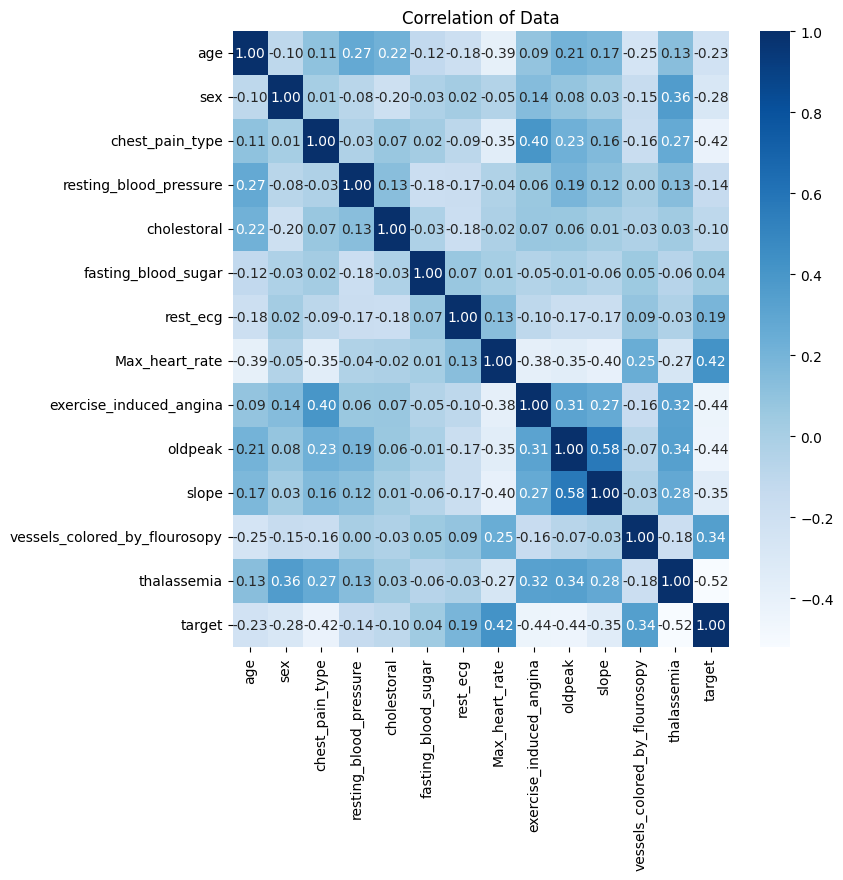

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt='.2f')
plt.title('Correlation of Data')
plt.savefig('visualizations/data_corr_heatmap.png', dpi=150)
plt.show()

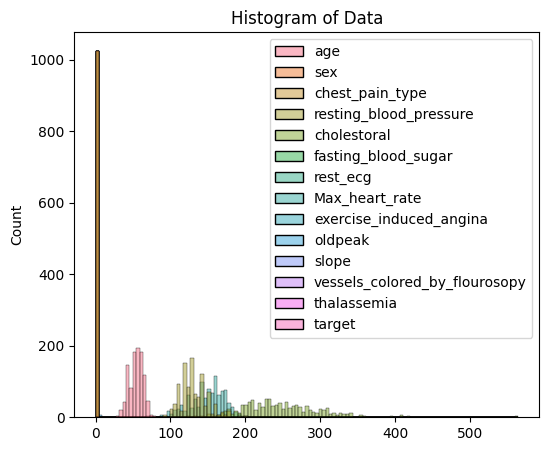

In [7]:
plt.figure(figsize=(6,5))
sns.histplot(data)
plt.title('Histogram of Data')
plt.savefig('visualizations/data_histplot.png', dpi=150)
plt.show()

## Splitting Features and Target Columns

In [8]:
X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Oversampling because of large data difference

In [9]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Building Model

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

for model_name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f'Model: {model_name} ——> Cross Validation Score: {np.mean(cv_score):.2f}')

Model: Logistic Regression ——> Cross Validation Score: 0.85
Model: Random Forest Classifier ——> Cross Validation Score: 0.99
Model: XGBoost ——> Cross Validation Score: 0.99


In [11]:
# Random Forest & XGBoost has almost same cross validation score
# Proceeding with XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluating Model

In [12]:
y_prediction = model_xgb.predict(X_test)

acc_score = accuracy_score(y_test, y_prediction)
print(f'Accuracy Score: {acc_score:.2f}')

Accuracy Score: 0.99


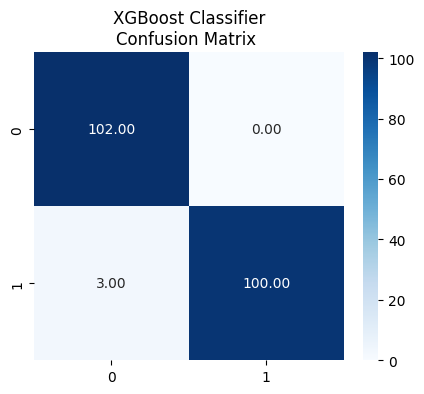

In [13]:
conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("XGBoost Classifier\nConfusion Matrix ")
plt.savefig('visualizations/xgb_confusion_matrix.png', dpi=100)
plt.show()